In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('/workspaces/projects/TTC_Delay_Analysis/Data/data.csv')

In [16]:
delay_counts = data['Route Name'].value_counts().reset_index()
delay_counts.columns = ['Route Name', 'Delay Count']

# Select the top 10 routes
top_10_routes = delay_counts.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(top_10_routes, x='Route Name', y='Delay Count', title='Top 10 Routes with Most Frequent Delays',color='Delay Count', color_continuous_scale='Reds')

# Show the plot
fig.show()

In [18]:
avg_min_delay = data.groupby('Route Name')['Min Delay'].mean().reset_index()
avg_min_delay.columns = ['Route Name', 'Avg Min Delay']

# Select the top 10 routes
top_10_avg_min_delay = avg_min_delay.nlargest(10, 'Avg Min Delay')

# Create a bar plot using Plotly Express
fig_avg_min_delay = px.bar(top_10_avg_min_delay, x='Route Name', y='Avg Min Delay', title='Top 10 Routes with Highest Average Min Delay', color='Avg Min Delay',color_continuous_scale='Reds')

# Show the plot
fig_avg_min_delay.show()

In [20]:
# Calculate the count of delays for each 'Route Name'
delay_counts = data['Route Name'].value_counts().reset_index()
delay_counts.columns = ['Route Name', 'Delay Count']

# Select the least 10 routes with the least frequent delays
least_10_routes = delay_counts.nsmallest(10, 'Delay Count')

# Create a bar plot using Plotly Express
fig_least_frequent_delays = px.bar(least_10_routes, x='Route Name', y='Delay Count', title='Least 10 Routes with Least Frequent Delays', color='Delay Count',color_continuous_scale='Reds')

# Show the plot
fig_least_frequent_delays.show()

In [21]:
avg_min_delay = data.groupby('Route Name')['Min Delay'].mean().reset_index()
avg_min_delay.columns = ['Route Name', 'Avg Min Delay']

# Select the least 10 routes with the least average 'Min Delay'
least_10_avg_min_delay = avg_min_delay.nsmallest(10, 'Avg Min Delay')

# Create a bar plot using Plotly Express
fig_least_avg_min_delay = px.bar(least_10_avg_min_delay, x='Route Name', y='Avg Min Delay', title='Least 10 Routes with Least Average Min Delay', color='Avg Min Delay',color_continuous_scale='Reds')

# Show the plot
fig_least_avg_min_delay.show()

In [25]:
df=data

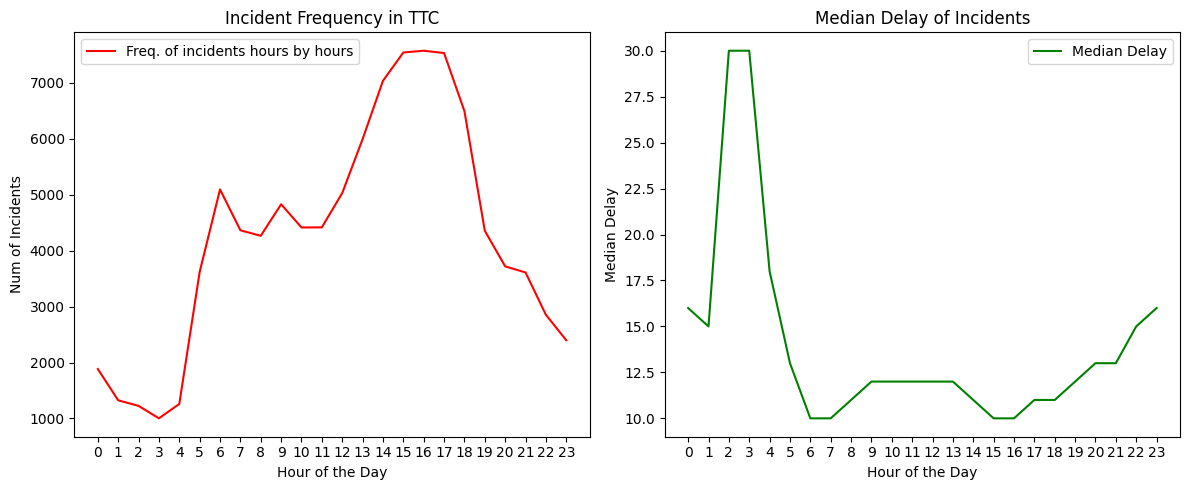

In [27]:
df_count = df.groupby('Hour')['Min Delay'].count().reset_index()

# Calculate the median delay for each 'Hour'
df_median = df.groupby('Hour')['Min Delay'].median().reset_index()

# Set up Matplotlib subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot for incident frequency
sns.lineplot(data=df_count, x='Hour', y='Min Delay', label='Freq. of incidents hours by hours', color='red', ax=axes[0])
axes[0].set_xticks(np.arange(0, 24))
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel('Num of Incidents')
axes[0].set_title("Incident Frequency in TTC")

# Second subplot for median delay
sns.lineplot(data=df_median, x='Hour', y='Min Delay', label='Median Delay', color='green', ax=axes[1])
axes[1].set_xticks(np.arange(0, 24))
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Median Delay')
axes[1].set_title('Median Delay of Incidents')

# Ensures proper spacing between subplots
plt.tight_layout()
plt.show()

/workspaces/projects/.conda/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




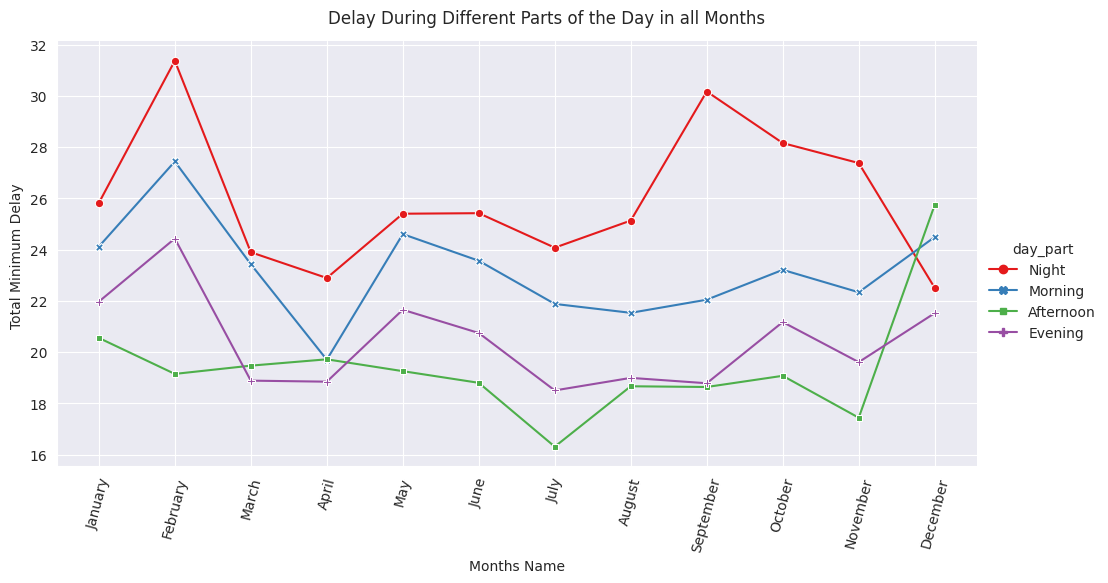

In [29]:
df = data.groupby('Month')['Min Delay'].mean()

# Define a custom color palette mapping 'day_part' values to colors
custom_palette = sns.color_palette("Set1", n_colors=len(data['day_part'].unique()))

# Set the style and custom color palette
sns.set_style('darkgrid')
sns.set_palette(custom_palette)

g = sns.relplot(data=data, kind='line', y='Min Delay', x='Month', hue='day_part',style='day_part',
                aspect=2, markers=True, ci=None, dashes=False)

g.fig.suptitle("Delay During Different Parts of the Day in all Months", y=1.03)
g.set(xlabel='Months Name',
      ylabel='Total Minimum Delay ')

# Rotate the x-axis labels
plt.xticks(rotation=75)

# Show the plot
plt.show()

In [31]:
data

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,Route Name,Year,Month,Day_Num,Hour,Minute,day_part
0,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658,DON MILLS NIGHT BUS,2022,January,1,2,0,Night
1,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0,YONGE NIGHT BUS,2022,January,1,2,0,Night
2,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0,YONGE NIGHT BUS,2022,January,1,2,7,Night
3,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0,YONGE NIGHT BUS,2022,January,1,2,13,Night
4,2022-01-01,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60,0,OSSINGTON NIGHT BUS,2022,January,1,2,16,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101826,2023-11-30,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,10,20,3581,SHEPPARD WEST,2023,November,30,0,1,Night
101827,2023-11-30,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,24,48,8390,STEELES WEST EXPRESS,2023,November,30,0,25,Night
101828,2023-11-30,116,00:44,Thursday,KENNEDY STATION,Cleaning - Unsanitary,10,20,1652,MORNINGSIDE,2023,November,30,0,44,Night
101829,2023-11-30,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operations - Operator,11,21,8192,BATHURST,2023,November,30,0,48,Night


In [32]:
df=data

In [34]:
df_2022 = df[df['Year'] == 2022]
df_2023 = df[df['Year'] == 2023]

# Calculate average 'Min Delay' for each month
avg_delay_2022 = df_2022.groupby('Month')['Min Delay'].mean().reset_index()
avg_delay_2023 = df_2023.groupby('Month')['Min Delay'].mean().reset_index()
# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Calculate average 'Min Delay' for each month
avg_delay_2022 = df_2022.groupby('Month')['Min Delay'].mean().reindex(months_order).reset_index()
avg_delay_2023 = df_2023.groupby('Month')['Min Delay'].mean().reindex(months_order).reset_index()

# Create a Plotly line graph
fig = px.line(avg_delay_2022, x='Month', y='Min Delay', title='Average Min Delay per Month - Year 2022',
              labels={'Min Delay': 'Average Min Delay', 'Month': 'Months Name'},
              category_orders={'Month': months_order},
              line_shape='linear', markers=True)

# Add a line for Year 2023
fig.add_trace(go.Scatter(x=avg_delay_2023['Month'], y=avg_delay_2023['Min Delay'],
                         mode='lines+markers', name='Year 2023', line=dict(color='orange')))

# Update layout
fig.update_layout(title_text="Average Min Delay per Month - Year 2022 vs Year 2023")

# Show the plot
fig.show()